## <center style="color:blue">Data Augmentation To Address Overfitting In Flower Classification CNN</center>


In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc


Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations


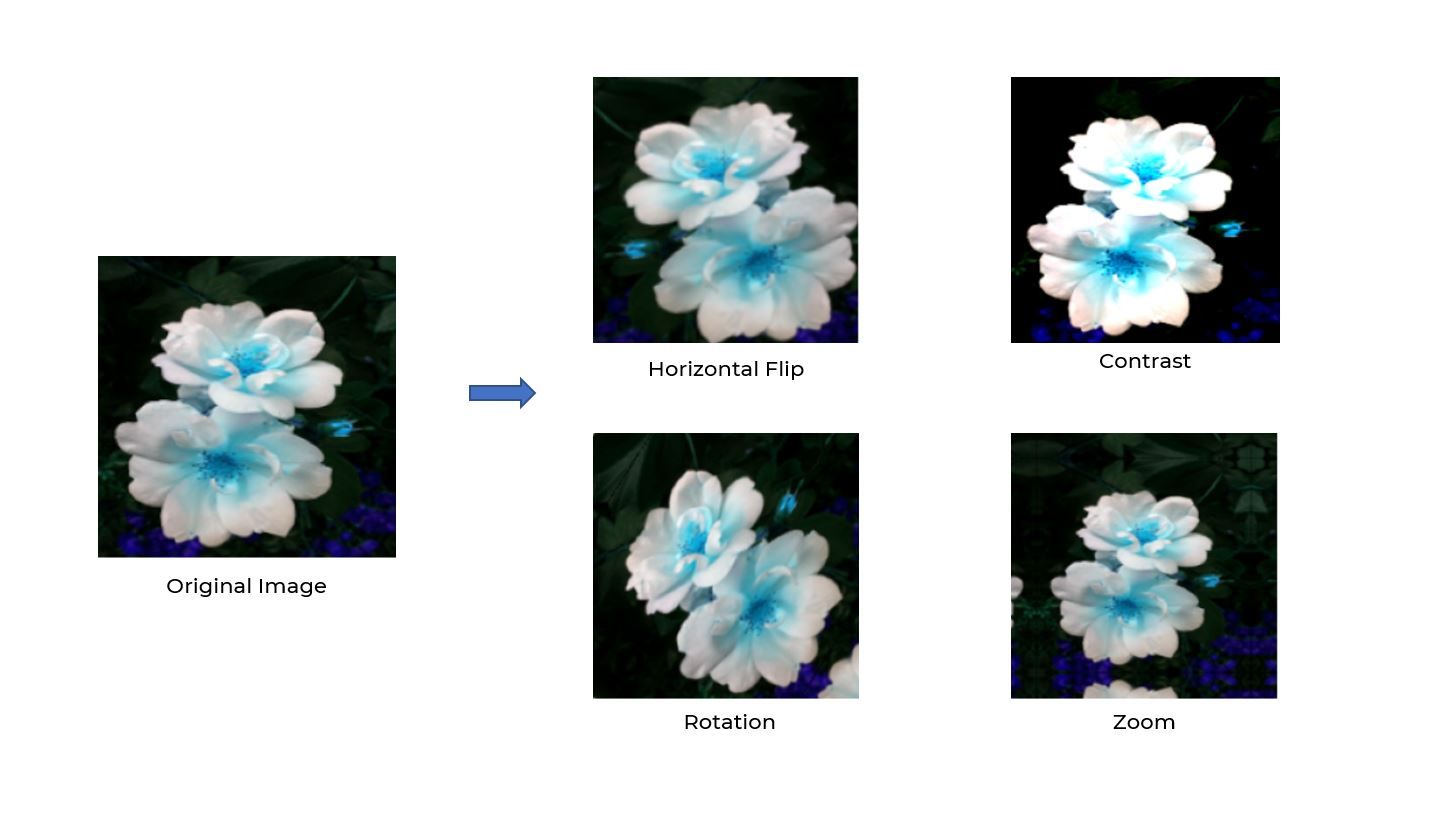


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder


**Load flowers dataset**


In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

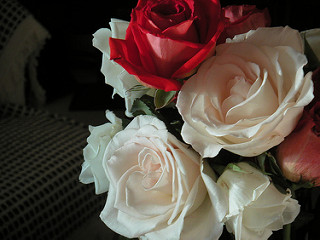

In [7]:
PIL.Image.open(str(roses[1]))

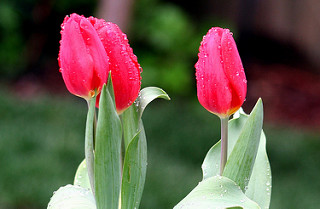

In [8]:

tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**


In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [14]:
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [16]:
X, y = [], []

for flower_type, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(flowers_labels_dict[flower_type])

In [17]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((3670, 180, 180, 3), (3670,))

**Train test split**


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2752, 180, 180, 3), (918, 180, 180, 3), (2752,), (918,))

In [19]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

**Preprocessing: scale images**


In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Build convolutional neural network and train it**


In [21]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)   # default activation is linear
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 16s 35ms/step - loss: 1.4618 - accuracy: 0.3735
Epoch 2/10
86/86 [==============================] - 3s 29ms/step - loss: 1.0552 - accuracy: 0.5749
Epoch 3/10
86/86 [==============================] - 2s 29ms/step - loss: 0.8654 - accuracy: 0.6661
Epoch 4/10
86/86 [==============================] - 2s 29ms/step - loss: 0.7386 - accuracy: 0.7177
Epoch 5/10
86/86 [==============================] - 2s 29ms/step - loss: 0.5404 - accuracy: 0.8031
Epoch 6/10
86/86 [==============================] - 2s 29ms/step - loss: 0.3592 - accuracy: 0.8805
Epoch 7/10
86/86 [==============================] - 2s 29ms/step - loss: 0.1978 - accuracy: 0.9368
Epoch 8/10
86/86 [==============================] - 2s 29ms/step - loss: 0.1147 - accuracy: 0.9669
Epoch 9/10
86/86 [==============================] - 2s 29ms/step - loss: 0.0770 - accuracy: 0.9804
Epoch 10/10
86/86 [==============================] - 3s 29ms/step - loss: 0.0549 - accuracy: 0.9851


In [22]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 27ms/step - loss: 1.7946 - accuracy: 0.6481


[1.7945713996887207, 0.6481481194496155]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**


In [23]:

predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 13ms/step


array([[  3.7282705 ,   9.500736  ,   4.786845  , -14.54634   ,
         -0.8371621 ],
       [  9.701516  ,   5.0656734 ,  -5.7040377 ,  -7.4424543 ,
          2.0261073 ],
       [  2.5150638 ,   1.9715118 ,  16.27222   , -12.284475  ,
         -7.6664114 ],
       ...,
       [  0.2017573 ,   0.87031007,  -7.9236298 ,   7.4460273 ,
          2.7445078 ],
       [  1.3081709 ,   2.4441094 ,   1.9677685 ,   3.9251034 ,
         -2.3717563 ],
       [ -1.3880761 ,  -9.726681  ,  -0.42670798,   5.586771  ,
          2.9160304 ]], dtype=float32)

In [24]:
# the values are in linear scale and not probabilities
# to get probabilities we need to use softmax
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0748253e-03, 9.8803073e-01, 8.8624461e-03, 3.5584223e-11,
       3.1994718e-05], dtype=float32)>

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

**Improve Test Accuracy Using Data Augmentation**


tf.keras.preprocessing.image(https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom)


In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        # Allow memory growth on the first GPU
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(f"Error: {e}")

Error: Physical devices cannot be modified after being initialized


In [42]:

# Your data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.5)
])

# Apply augmentation to a single image
# augmented_image = data_augmentation(X[0:1])  # Apply augmentation to the first image
# augmented_image

# Optional: Monitor GPU usage
# !nvidia-smi

In [47]:
data_augmentation(X[0])

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[19.50743   , 34.145702  , 20.869156  ],
        [19.653309  , 34.63118   , 21.015034  ],
        [16.969364  , 31.545229  , 18.699442  ],
        ...,
        [ 4.2849298 , 17.265146  , 10.064161  ],
        [ 4.7024355 , 15.45046   ,  9.7707    ],
        [ 3.9554272 , 13.47265   ,  8.302295  ]],

       [[15.145405  , 29.145405  , 17.145405  ],
        [15.624208  , 30.78339   , 17.844559  ],
        [14.484062  , 30.070168  , 16.953478  ],
        ...,
        [14.734674  , 37.87802   , 23.423256  ],
        [15.845202  , 37.290302  , 24.506252  ],
        [13.094534  , 32.872925  , 20.756815  ]],

       [[14.884291  , 28.51594   , 16.515938  ],
        [14.88331   , 30.291557  , 17.352726  ],
        [13.666948  , 30.422894  , 17.        ],
        ...,
        [21.551632  , 47.641476  , 32.30758   ],
        [20.109488  , 46.389824  , 30.885109  ],
        [16.59987   , 42.852512  , 25.900427  ]],

       ...,

     

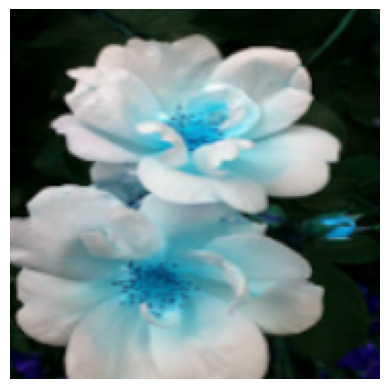

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype(np.uint8))

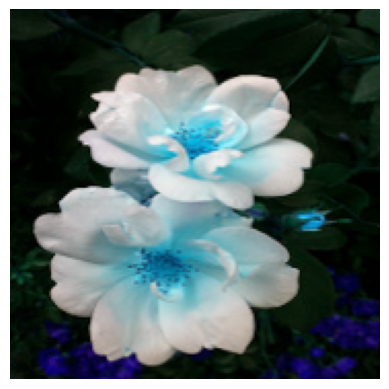

In [45]:
# original image
plt.axis('off')
plt.imshow(X[0])

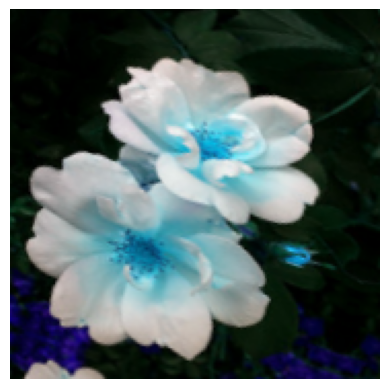

In [60]:
data_augmentation = tf.keras.Sequential([
    # tf.keras.layers.RandomContrast(0.9),
    layers.RandomRotation(0.2)
])

plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype(np.uint8))

**Train the model using data augmentation and a drop out layer**


In [62]:
img_height = 180
img_width = 180
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

In [63]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 28s 260ms/step - loss: 1.3347 - accuracy: 0.4346
Epoch 2/30
86/86 [==============================] - 24s 278ms/step - loss: 1.0336 - accuracy: 0.5796
Epoch 3/30
86/86 [==============================] - 23s 270ms/step - loss: 0.9315 - accuracy: 0.6352
Epoch 4/30
86/86 [==============================] - 22s 257ms/step - loss: 0.8581 - accuracy: 0.6730
Epoch 5/30
86/86 [==============================] - 21s 249ms/step - loss: 0.8017 - accuracy: 0.6908
Epoch 6/30
86/86 [==============================] - 21s 248ms/step - loss: 0.7368 - accuracy: 0.7217
Epoch 7/30
86/86 [==============================] - 21s 248ms/step - loss: 0.7256 - accuracy: 0.7318
Epoch 8/30
86/86 [==============================] - 21s 247ms/step - loss: 0.6447 - accuracy: 0.7500
Epoch 9/30
86/86 [==============================] - 21s 244ms/step - loss: 0.6066 - accuracy: 0.7660
Epoch 10/30
86/86 [==============================] - 22s 254ms/step - loss: 0.5680 - accura

In [64]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 24ms/step - loss: 1.1780 - accuracy: 0.7364


[1.177958607673645, 0.7363834381103516]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**
